### Name: Humberto Diaz
### Date: June 4th, 2025

## Task 2
- **Read the data from the different sources:** <br>
csv, excel, api, txtfiles (multiple textfiles in the meaning_files folder)
    api url = https://jsonplaceholder.typicode.com/posts

- **Merge the Customer data and the data from the api --> Use customer id and userid**
- **Create a schema  called ETL_ASSIGNMENT_Q2**
- **create a table called "productSales" load the merged file**
- **Create a table called "Inventory" and load the inventory data**
- **Create a table called "Meaning" and load the meaning data. Include and ID field with an auto increament of 1**

### 1. Import required libraries

In [1]:
import pandas as pd
import requests
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import glob
import openpyxl
import os

/Users/eleazar/Documents/Projects/DAMDS/venv/lib/python3.13/site-packages/snowflake/connector/options.py:104: UserWarning: You have an incompatible version of 'pyarrow' installed (20.0.0), please install a version that adheres to: 'pyarrow<19.0.0; extra == "pandas"'
  warn_incompatible_dep(


### 2. Connect to Snowflake

In [2]:
print("Connecting to Snowflake...")
conn = snowflake.connector.connect(
    user='HUMBERTOD',
    password='Danielaindarte11',
    account='JQBVMSD-EV26583',
    warehouse='COMPUTE_WH',
    database='TEST'
)
cur = conn.cursor()
print("Connection established.\n")

Connecting to Snowflake...
Connection established.



### 3. Load customer data from CSV

In [3]:
print("Loading customer data from CSV...")
customer_df = pd.read_csv('/Users/eleazar/Documents/Projects/DAMDS/day2/Question2/customer_data.csv')
customer_df.columns = customer_df.columns.str.upper()
print("Customer data loaded.\n")
print(customer_df.head(), "\n")

Loading customer data from CSV...
Customer data loaded.

   CUSTOMER_ID        NAME                  EMAIL         PHONE  \
0            1  Customer_1  customer1@example.com  555-001-1234   
1            2  Customer_2  customer2@example.com  555-002-1234   
2            3  Customer_3  customer3@example.com  555-003-1234   
3            4  Customer_4  customer4@example.com  555-004-1234   
4            5  Customer_5  customer5@example.com  555-005-1234   

           ADDRESS  
0  Address_1, City  
1  Address_2, City  
2  Address_3, City  
3  Address_4, City  
4  Address_5, City   



### 4. Load API data

In [4]:
print("Fetching data from API...")
url = 'https://jsonplaceholder.typicode.com/posts'
response = requests.get(url)
posts_data = response.json()
posts_df = pd.DataFrame(posts_data)[['userId', 'id', 'title', 'body']]
posts_df.columns = ['USERID', 'ID', 'TITLE', 'BODY']
posts_df = posts_df.head()  
print("API data loaded. Number of posts:", len(posts_df), "\n")
print(posts_df.head(), "\n")

Fetching data from API...
API data loaded. Number of posts: 5 

   USERID  ID                                              TITLE  \
0       1   1  sunt aut facere repellat provident occaecati e...   
1       1   2                                       qui est esse   
2       1   3  ea molestias quasi exercitationem repellat qui...   
3       1   4                               eum et est occaecati   
4       1   5                                 nesciunt quas odio   

                                                BODY  
0  quia et suscipit\nsuscipit recusandae consequu...  
1  est rerum tempore vitae\nsequi sint nihil repr...  
2  et iusto sed quo iure\nvoluptatem occaecati om...  
3  ullam et saepe reiciendis voluptatem adipisci\...  
4  repudiandae veniam quaerat sunt sed\nalias aut...   



### 5. Merge Customer and API data

In [5]:
print("Merging customer and API data...")
merged_df = pd.merge(customer_df, posts_df, left_on='CUSTOMER_ID', right_on='USERID', how='inner')
merged_df = merged_df.drop(columns=['USERID'])
print("Merged data shape:", merged_df.shape, "\n")
print(merged_df.head(), "\n")

Merging customer and API data...
Merged data shape: (5, 8) 

   CUSTOMER_ID        NAME                  EMAIL         PHONE  \
0            1  Customer_1  customer1@example.com  555-001-1234   
1            1  Customer_1  customer1@example.com  555-001-1234   
2            1  Customer_1  customer1@example.com  555-001-1234   
3            1  Customer_1  customer1@example.com  555-001-1234   
4            1  Customer_1  customer1@example.com  555-001-1234   

           ADDRESS  ID                                              TITLE  \
0  Address_1, City   1  sunt aut facere repellat provident occaecati e...   
1  Address_1, City   2                                       qui est esse   
2  Address_1, City   3  ea molestias quasi exercitationem repellat qui...   
3  Address_1, City   4                               eum et est occaecati   
4  Address_1, City   5                                 nesciunt quas odio   

                                                BODY  
0  quia et suscipi

### 6. Load inventory data from Excel

In [18]:
print("Loading inventory data from Excel...")
inventory_df = pd.read_excel('/Users/eleazar/Documents/Projects/DAMDS/day2/Question2/inventory_data.xlsx', sheet_name='Sheet1')
inventory_df.columns = inventory_df.columns.str.upper()
print("Inventory data loaded. Number of records:", len(inventory_df), "\n")
print(inventory_df.head(20), "\n")

Loading inventory data from Excel...
Inventory data loaded. Number of records: 20 

    PRODUCT_ID PRODUCT_NAME  STOCK_QUANTITY  UNIT_PRICE
0            1    Product_1              99       40.30
1            2    Product_2              77       60.54
2            3    Product_3              55       64.56
3            4    Product_4              12       36.20
4            5    Product_5              46       39.07
5            6    Product_6              34       74.53
6            7    Product_7              65       52.73
7            8    Product_8              30       70.64
8            9    Product_9              47       95.92
9           10   Product_10              43       67.83
10          11   Product_11              31       16.01
11          12   Product_12              93       98.11
12          13   Product_13              95       30.36
13          14   Product_14              37       42.51
14          15   Product_15              67       32.88
15          16   Pro

### 7. Load meaning data from text files

In [7]:
print("Loading meaning data from text files...")
meaning_files = glob.glob('/Users/eleazar/Documents/Projects/DAMDS/day2/Question2/meaning_files/*.txt')
meaning_data = []
for idx, file_path in enumerate(meaning_files, start=1):
    with open(file_path, 'r') as f:
        content = f.read().strip()
        meaning_data.append({'ID': idx, 'CONTENT': content})
meaning_df = pd.DataFrame(meaning_data)
print("Meaning data loaded. Number of records:", len(meaning_df), "\n")
print(meaning_df, "\n")

Loading meaning data from text files...
Meaning data loaded. Number of records: 5 

   ID                                            CONTENT
0   1  SfmYVwMtjmTNw8yU8piahuEInQsuOnoHCvUV8hbn621k8P...
1   2  vsQQ6Y8QhRYWB7gjV71AA5Yd4E7PbtYggziRVcl9KGxKkL...
2   3  4t1c6YyWmIznHTBBZFToztoBkIJRoEtXaOCyExqnElneBk...
3   4  PuHpIxPzta9gUqeLKs43wqqCr0jiaWhZkqLr01250yJ8ze...
4   5  pQu2Fzk0FgXZMWL5vOeGakpJA55l6rE4blGKtseLjPlFC5... 



### 8. Create schema and tables in Snowflake

In [8]:
print("Creating schema and tables in Snowflake...")
cur.execute("CREATE SCHEMA IF NOT EXISTS TEST.ETL_ASSIGNMENT_Q2")
cur.execute("""
CREATE OR REPLACE TABLE TEST.ETL_ASSIGNMENT_Q2.PRODUCTSALES (
    CUSTOMER_ID INT,
    NAME STRING,
    EMAIL STRING,
    PHONE STRING,
    ADDRESS STRING,
    ID INT,
    TITLE STRING,
    BODY STRING
)
""")
cur.execute("""
CREATE OR REPLACE TABLE TEST.ETL_ASSIGNMENT_Q2.INVENTORY (
    PRODUCT_ID INT,
    PRODUCT_NAME STRING,
    STOCK_QUANTITY INT,
    UNIT_PRICE FLOAT
)
""")
cur.execute("""
CREATE OR REPLACE TABLE TEST.ETL_ASSIGNMENT_Q2.MEANING (
    ID INT,
    CONTENT STRING
)
""")
print("Schema and tables created.\n")

Creating schema and tables in Snowflake...
Schema and tables created.



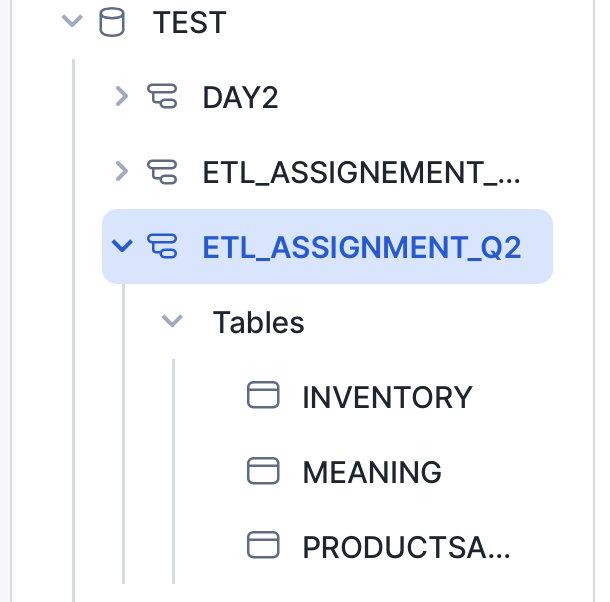

In [24]:
Image(filename="/Users/eleazar/Desktop/Screenshots/2025-06-04 at 14.29.00.png", width=400, height=400)

### 9. Upload data to Snowflake tables

In [19]:
print("Uploading data to Snowflake tables...")
merged_df = merged_df.reset_index(drop=True)
inventory_df = inventory_df.reset_index(drop=True)
meaning_df = meaning_df.reset_index(drop=True)
write_pandas(conn, merged_df, 'PRODUCTSALES', schema='ETL_ASSIGNMENT_Q2', database='TEST')
write_pandas(conn, inventory_df, 'INVENTORY', schema='ETL_ASSIGNMENT_Q2', database='TEST')
write_pandas(conn, meaning_df, 'MEANING', schema='ETL_ASSIGNMENT_Q2', database='TEST')
print("Data uploaded successfully.\n")

Uploading data to Snowflake tables...
Data uploaded successfully.



### 10. Display content of each table

In [14]:
print("PRODUCTSALES table contents:")
cur.execute("SELECT * FROM TEST.ETL_ASSIGNMENT_Q2.PRODUCTSALES LIMIT 5")
print(cur.fetchall(), "\n")

print("INVENTORY table contents:")
cur.execute("SELECT * FROM TEST.ETL_ASSIGNMENT_Q2.INVENTORY LIMIT 5")
print(cur.fetchall(), "\n")

print("MEANING table contents:")
cur.execute("SELECT * FROM TEST.ETL_ASSIGNMENT_Q2.MEANING")
print(cur.fetchall(), "\n")

PRODUCTSALES table contents:
[(1, 'Customer_1', 'customer1@example.com', '555-001-1234', 'Address_1, City', 1, 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'), (1, 'Customer_1', 'customer1@example.com', '555-001-1234', 'Address_1, City', 2, 'qui est esse', 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'), (1, 'Customer_1', 'customer1@example.com', '555-001-1234', 'Address_1, City', 3, 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'), (1, 'Customer_1', 

**For a better visualization:**

In [13]:
print("\nVerifying Loaded Data")
print("PRODUCTSALES table contents:")
cur.execute("SELECT * FROM TEST.ETL_ASSIGNMENT_Q2.PRODUCTSALES LIMIT 5")
print(pd.DataFrame(cur.fetchall(), columns=['CUSTOMER_ID', 'NAME', 'EMAIL', 'PHONE', 'ADDRESS', 'ID', 'TITLE', 'BODY']))

print("\nINVENTORY table contents:")
cur.execute("SELECT * FROM TEST.ETL_ASSIGNMENT_Q2.INVENTORY LIMIT 5")
print(pd.DataFrame(cur.fetchall(), columns=['PRODUCT_ID', 'PRODUCT_NAME', 'STOCK_QUANTITY', 'UNIT_PRICE']))

print("\nMEANING table contents:")
cur.execute("SELECT * FROM TEST.ETL_ASSIGNMENT_Q2.MEANING")
print(pd.DataFrame(cur.fetchall(), columns=['ID', 'CONTENT']))


Verifying Loaded Data
PRODUCTSALES table contents:
   CUSTOMER_ID        NAME                  EMAIL         PHONE  \
0            1  Customer_1  customer1@example.com  555-001-1234   
1            1  Customer_1  customer1@example.com  555-001-1234   
2            1  Customer_1  customer1@example.com  555-001-1234   
3            1  Customer_1  customer1@example.com  555-001-1234   
4            1  Customer_1  customer1@example.com  555-001-1234   

           ADDRESS  ID                                              TITLE  \
0  Address_1, City   1  sunt aut facere repellat provident occaecati e...   
1  Address_1, City   2                                       qui est esse   
2  Address_1, City   3  ea molestias quasi exercitationem repellat qui...   
3  Address_1, City   4                               eum et est occaecati   
4  Address_1, City   5                                 nesciunt quas odio   

                                                BODY  
0  quia et suscipit\nsuscip

**See the pictures in Snowflake:**

Inventory table:

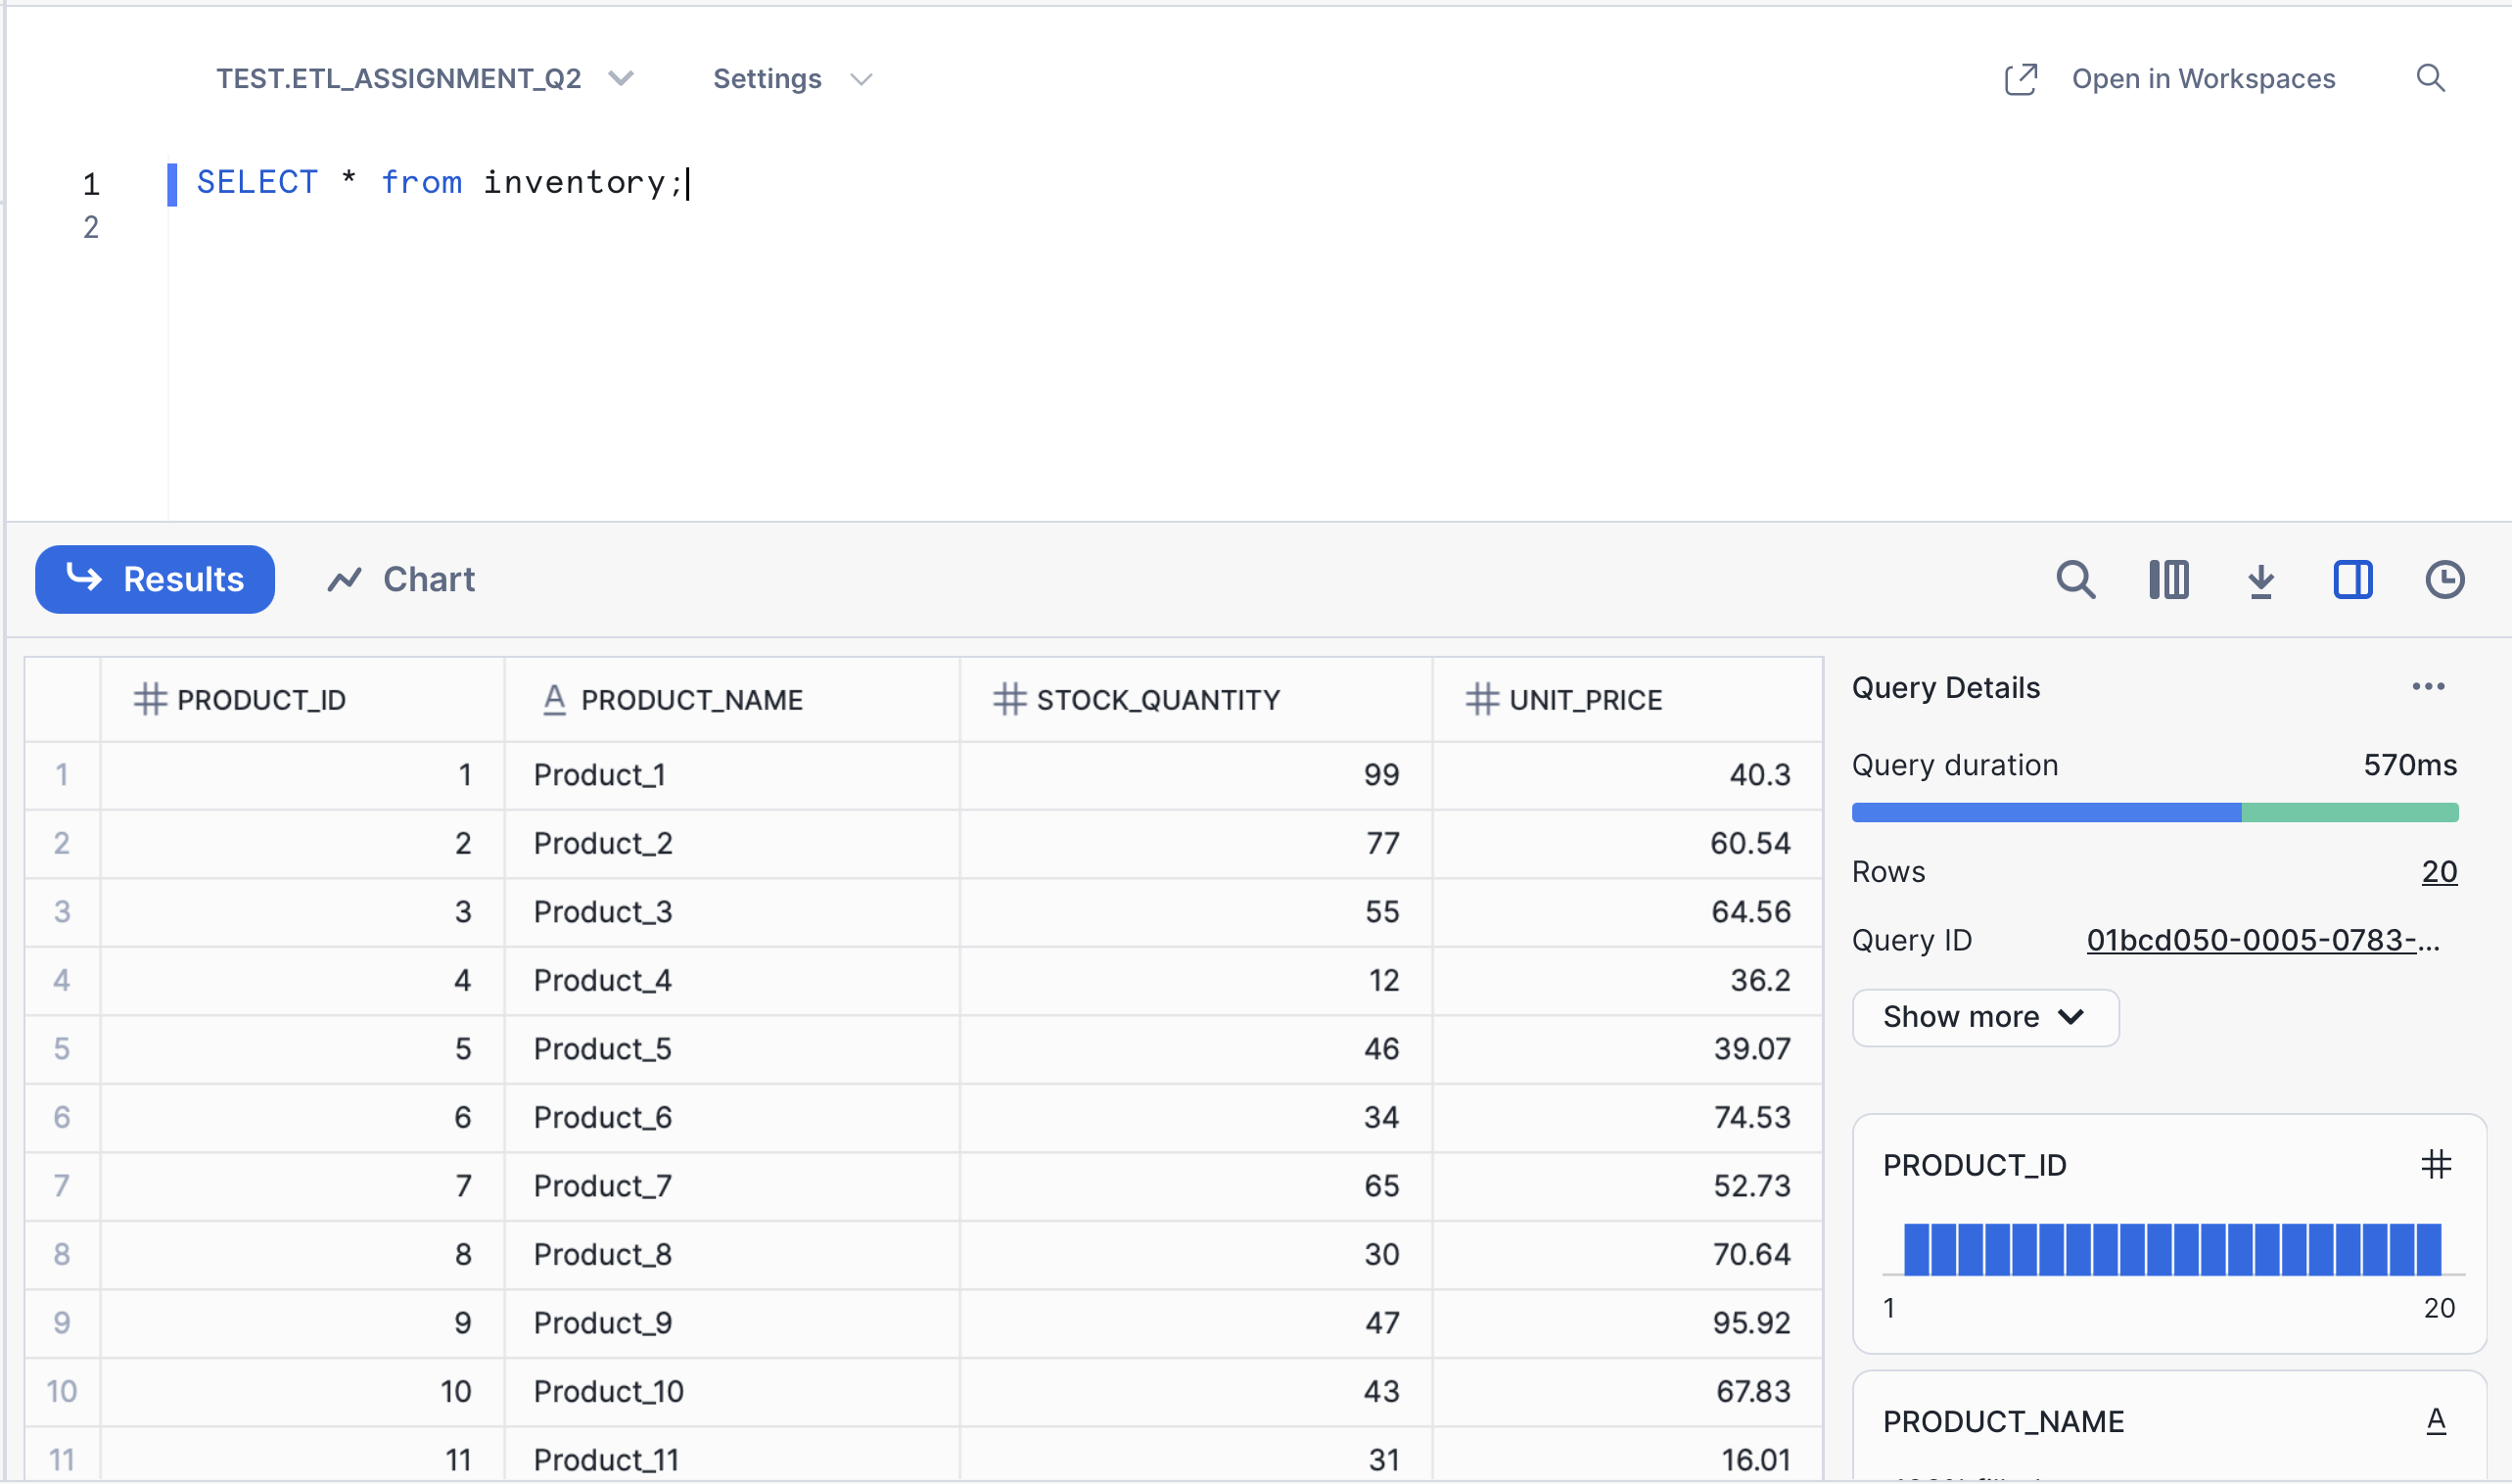

In [22]:
from IPython.display import Image

Image(filename="/Users/eleazar/Desktop/Screenshots/2025-06-04 at 18.13.00.png", width=700)

Meaning table:

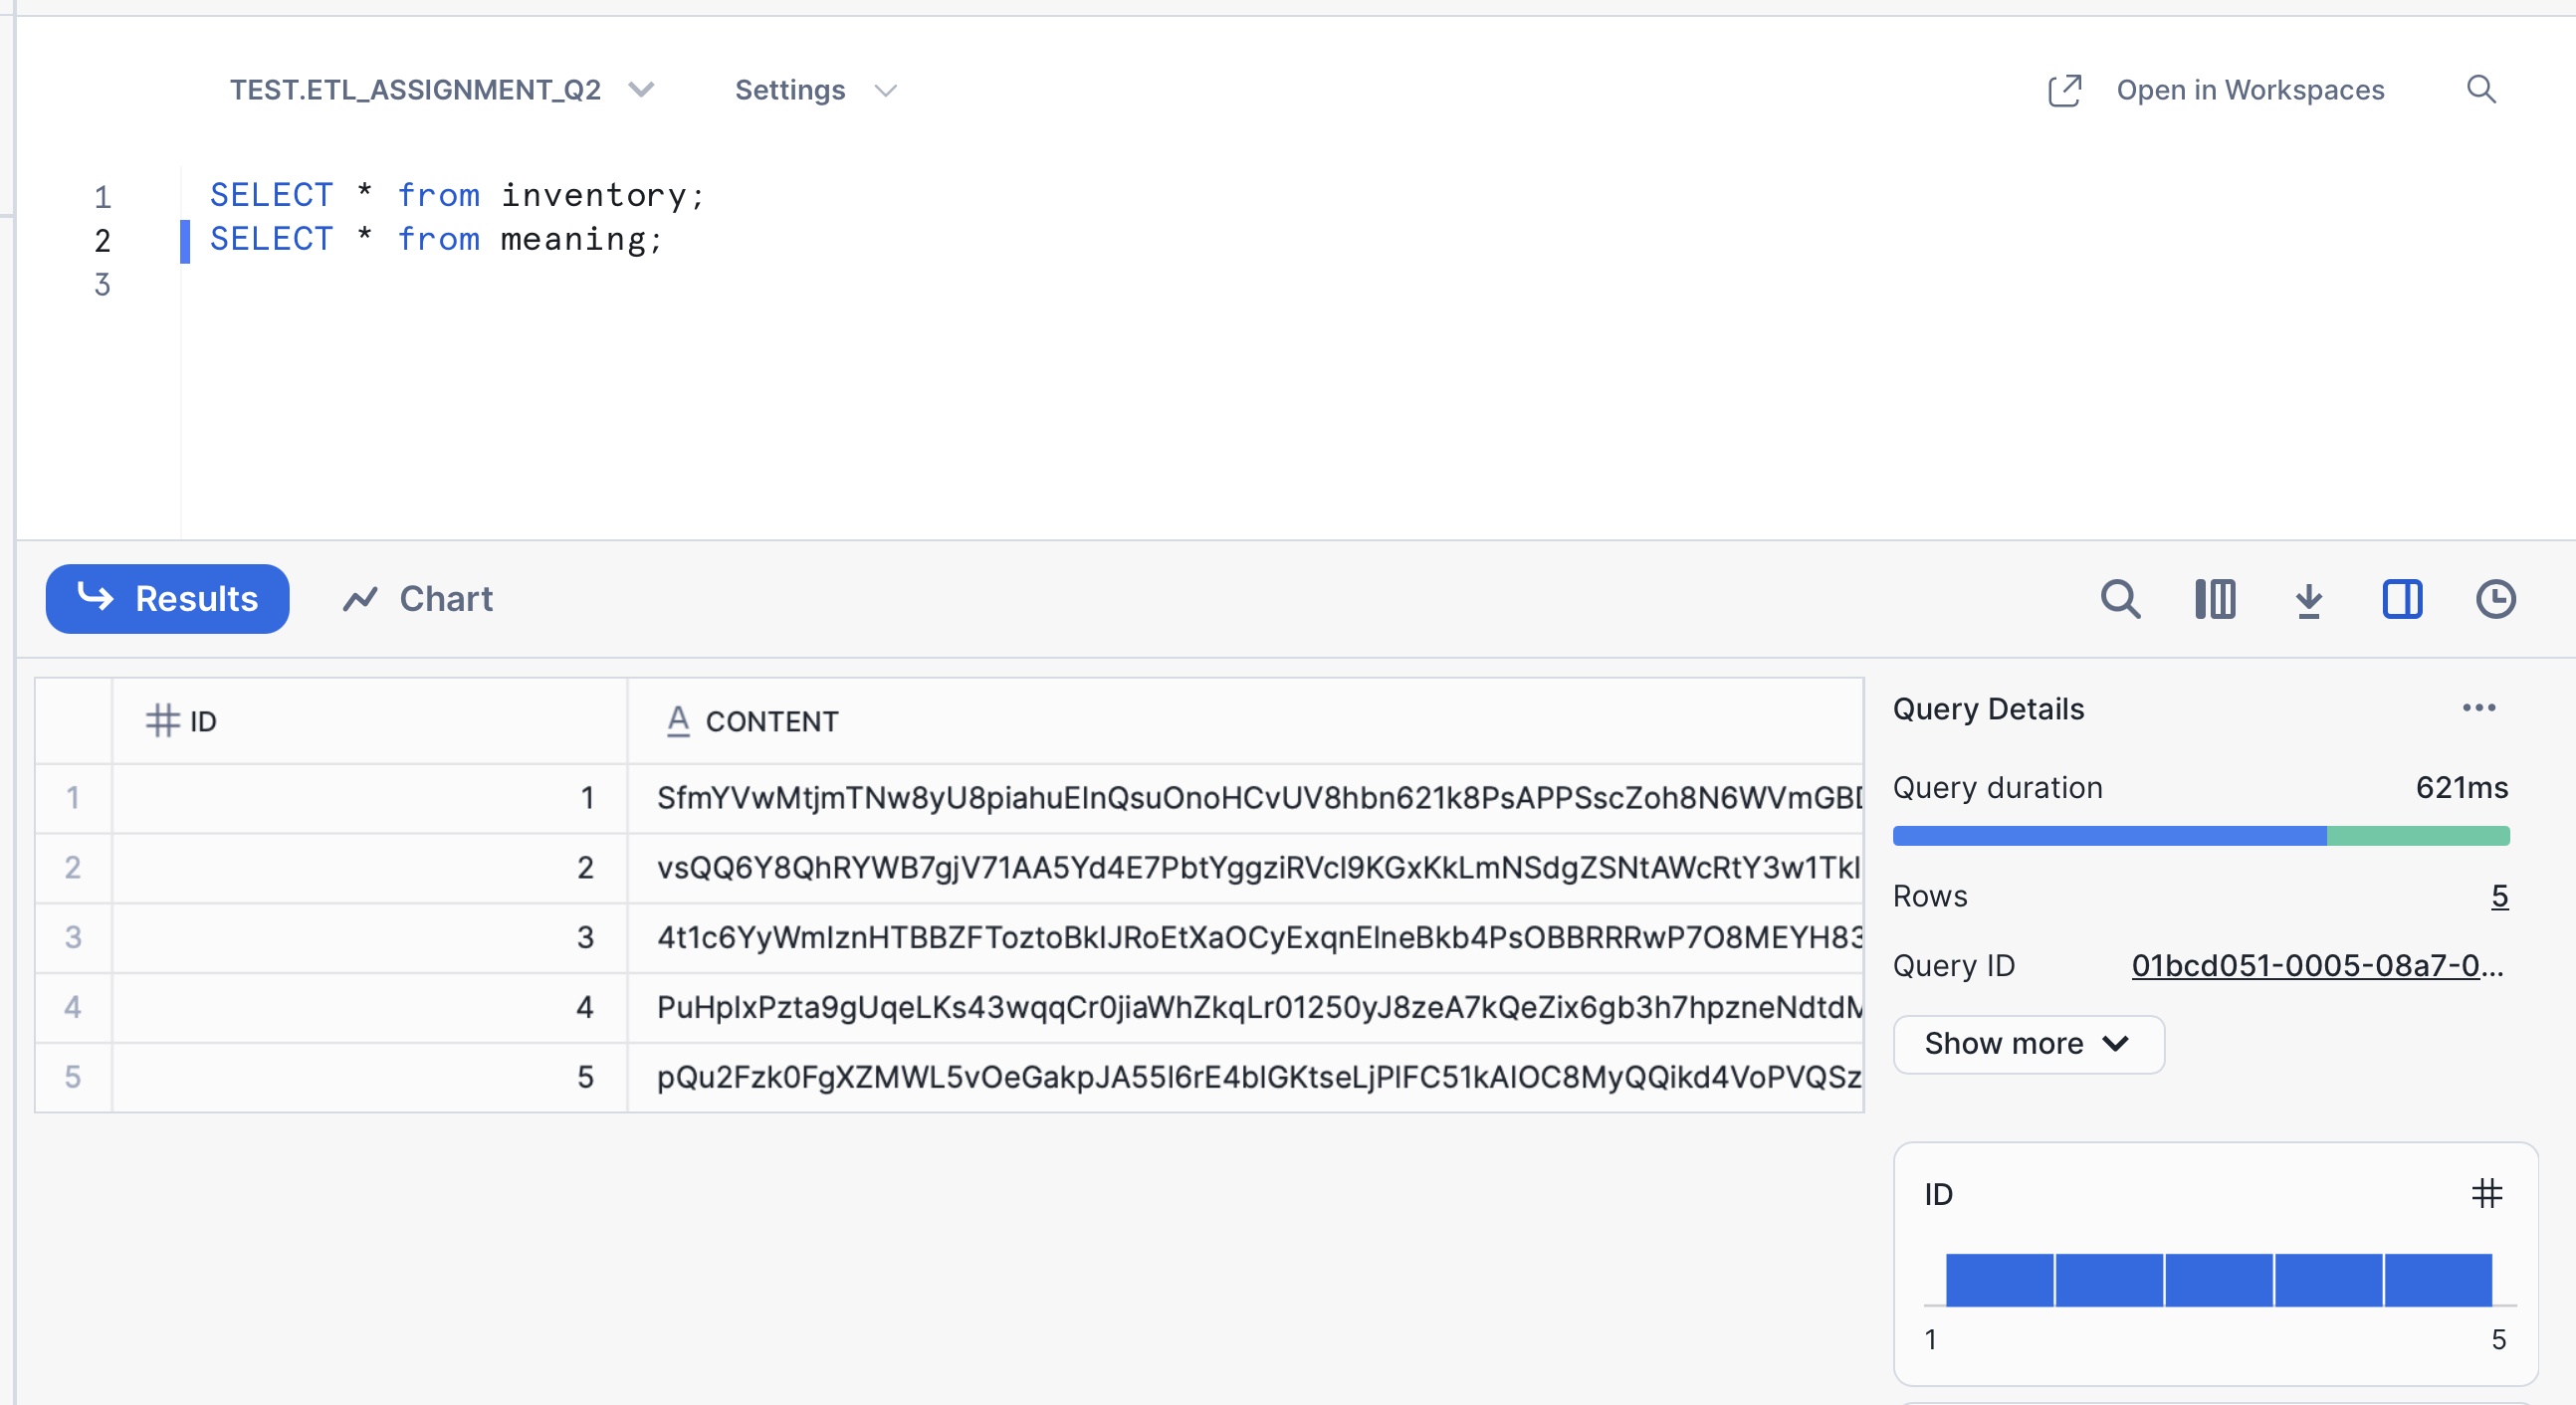

In [25]:
Image(filename="/Users/eleazar/Desktop/Screenshots/2025-06-04 at 18.13.00-2.png", width=700)

ProductSales table:

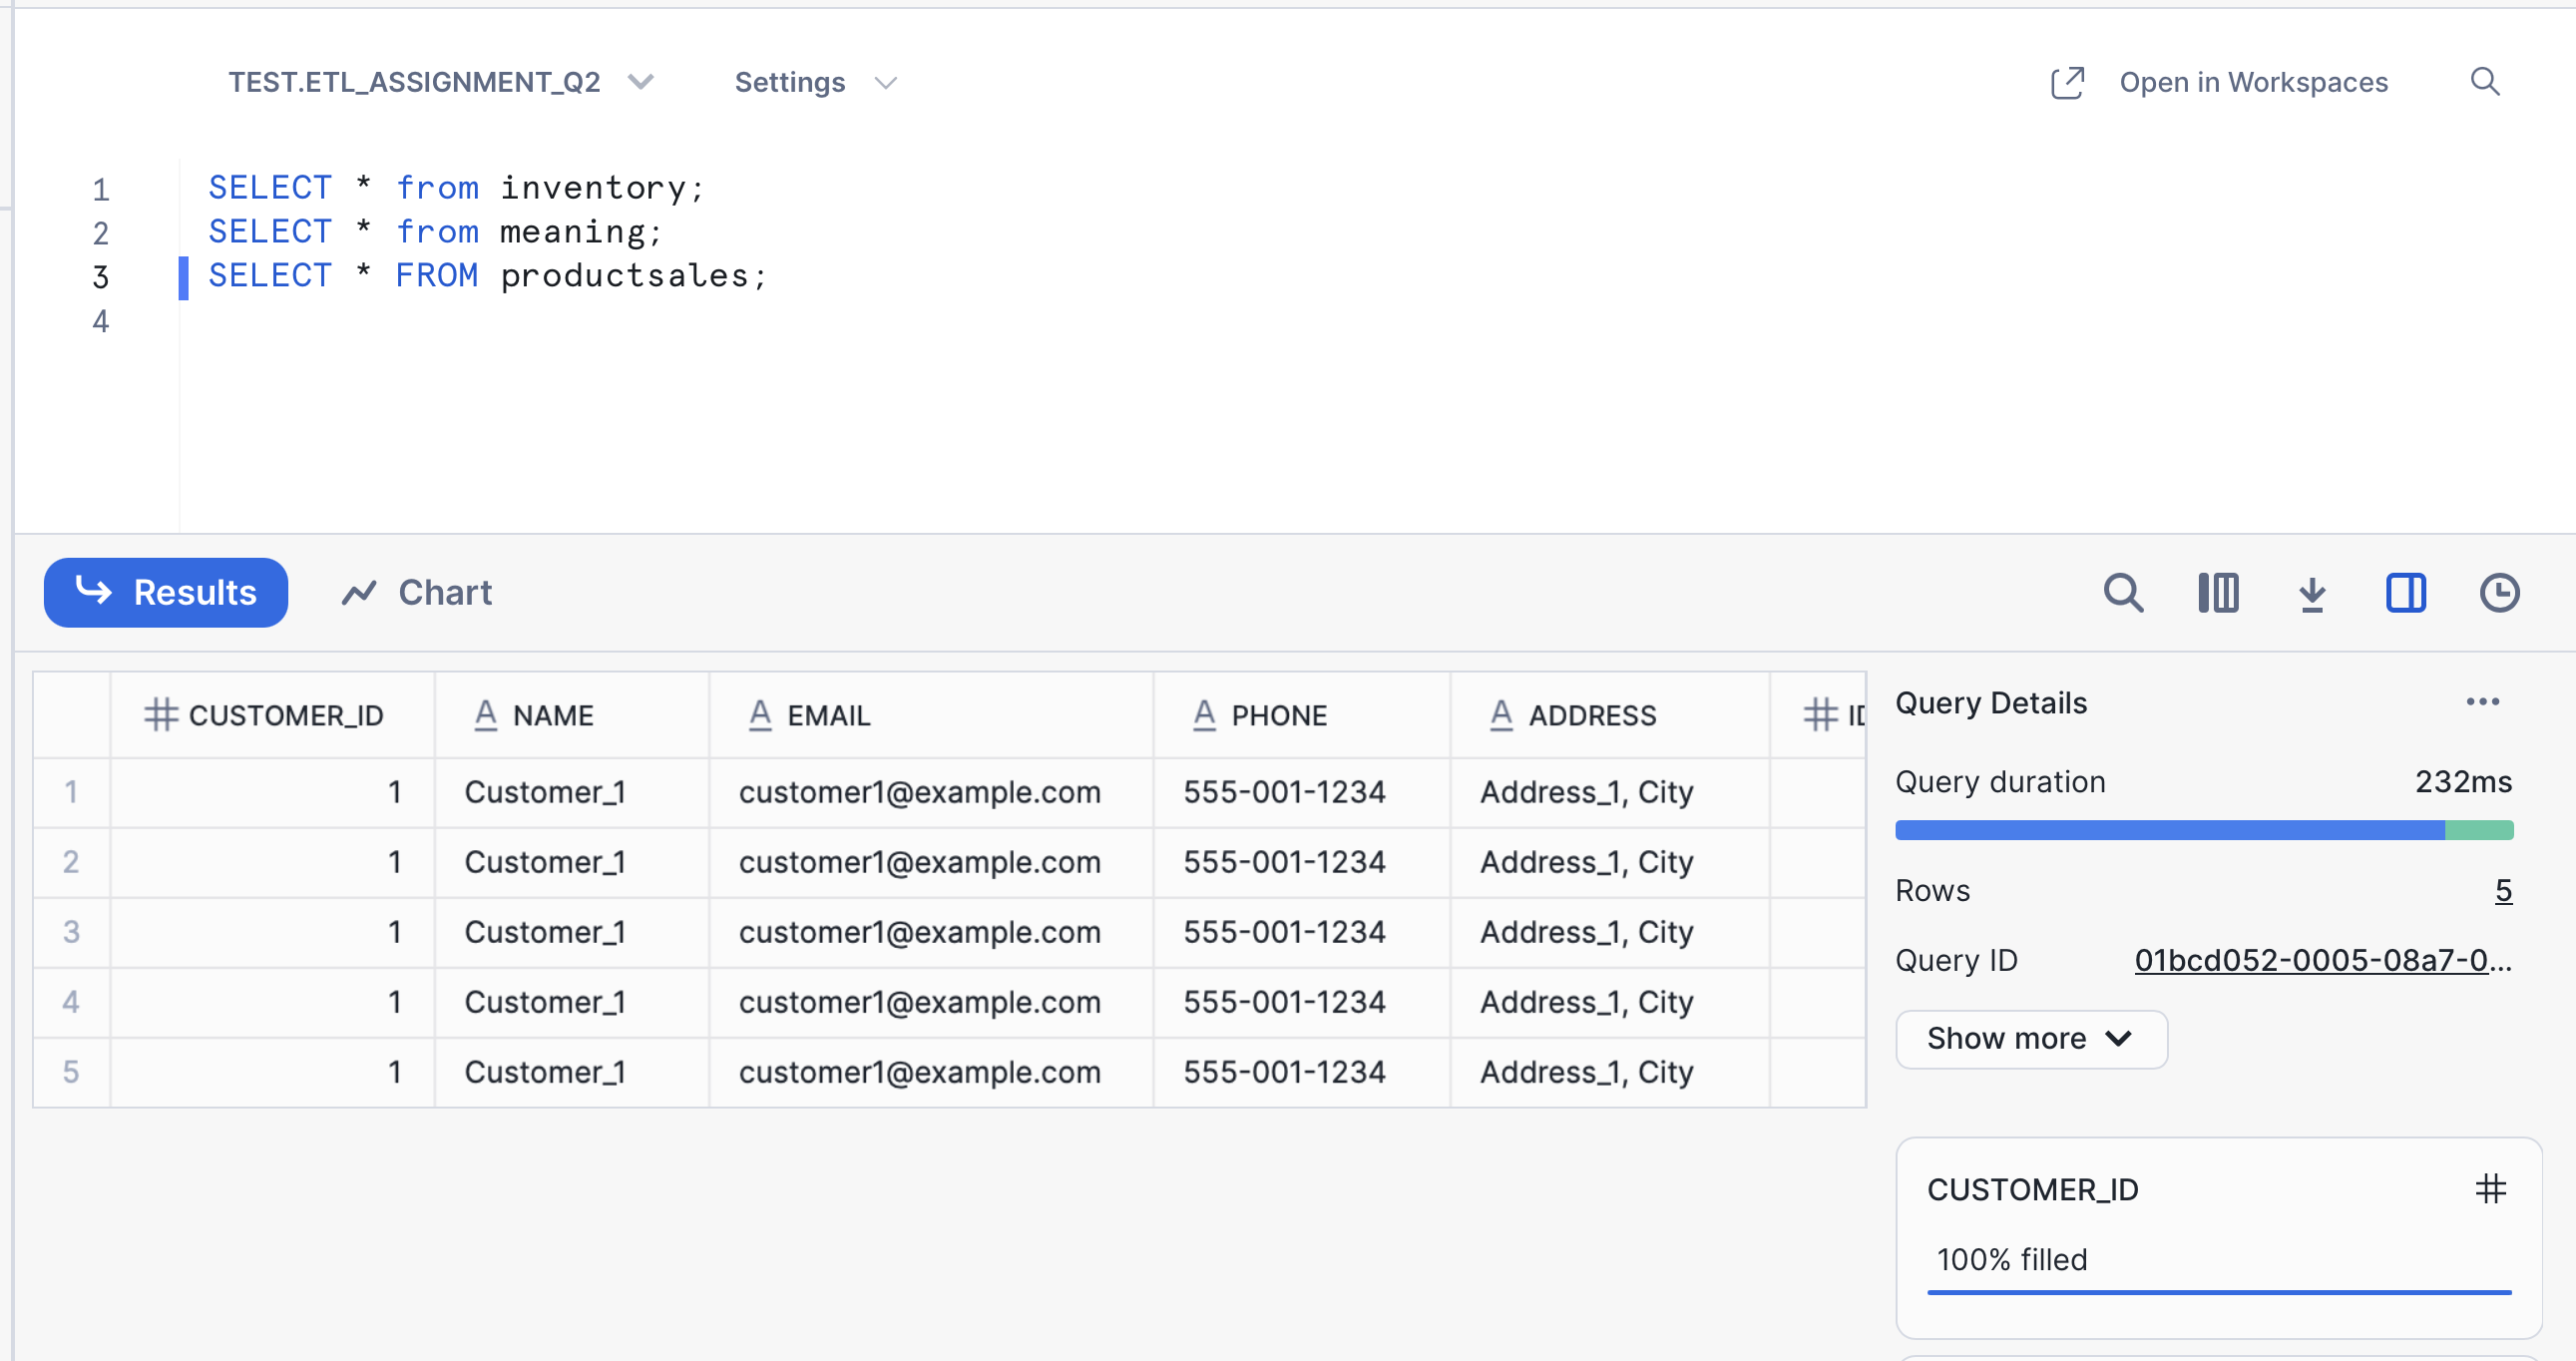

In [26]:
Image(filename="/Users/eleazar/Desktop/Screenshots/2025-06-04 at 18.14.00.png", width=700)

### 11. Close the connection

In [20]:
cur.close()
conn.close()
print("Snowflake connection closed.")

Snowflake connection closed.
